**SPAMBASE**

Classifying Email as Spam or Non-Spam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
data= pd.DataFrame(pd.read_csv("/content/drive/MyDrive/LABEXAM2/spambase.csv"))
data


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0




#**DATA CLEANING AND PREPROCESSING**

   with **Central Tendency**

In [ ]:
X = data[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = data['Class']

sf = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']

df = pd.DataFrame(X, columns=sf)

initial_rows, initial_cols = df.shape

null_values_count = df.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} of null values are found in the dataset.")
    df.dropna(inplace=True)
    print("Null values have been removed.")

duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows are found in the dataset.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

updated_rows, updated_cols = df.shape

print("\nDataset Information After Cleaning:")
print(df.info())

print("\nSummary of Statistics After Cleaning:")
print(df.describe())

print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")

394 duplicate rows are found in the dataset.
Duplicate rows have been removed.

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 4207 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4207 non-null   float64
 1   word_freq_address           4207 non-null   float64
 2   word_freq_all               4207 non-null   float64
 3   word_freq_3d                4207 non-null   float64
 4   word_freq_our               4207 non-null   float64
 5   word_freq_over              4207 non-null   float64
 6   word_freq_remove            4207 non-null   float64
 7   word_freq_internet          4207 non-null   float64
 8   word_freq_order             4207 non-null   float64
 9   word_freq_mail              4207 non-null   float64
 10  word_freq_receive           4207 non-null   float64
 11  word_freq_will              4207 non

#**MODEL EVALUTAION**
Logistic Regression,
Decision Tree,
Random Forest,
SVM

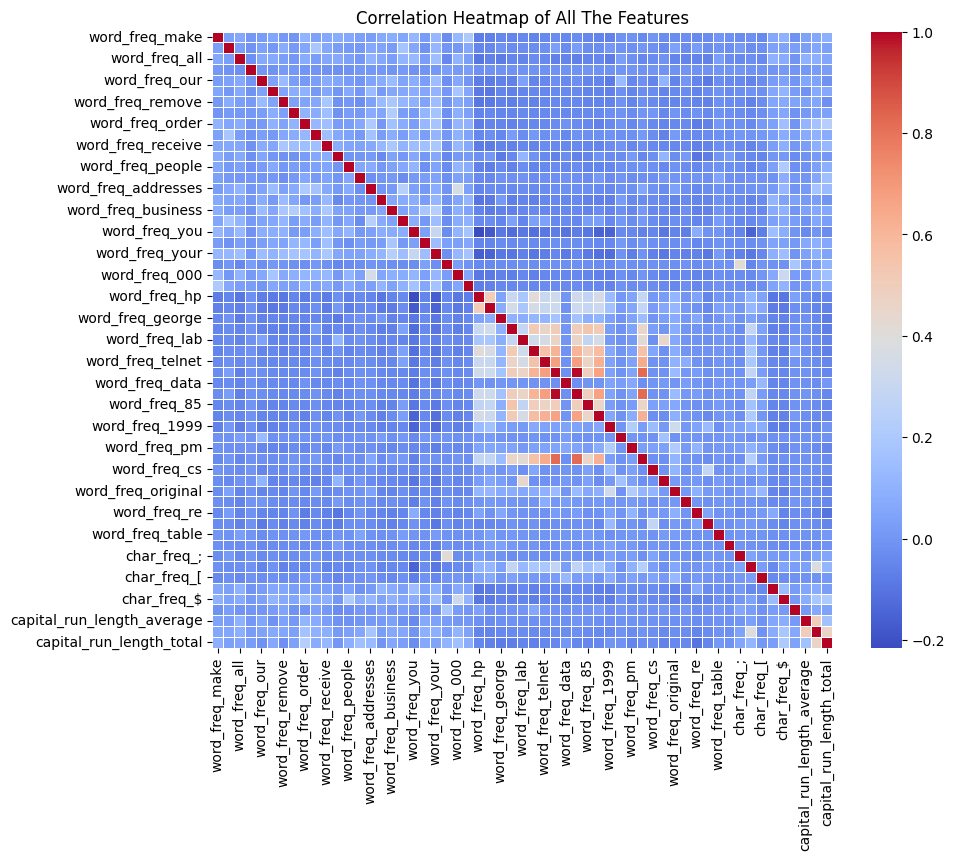

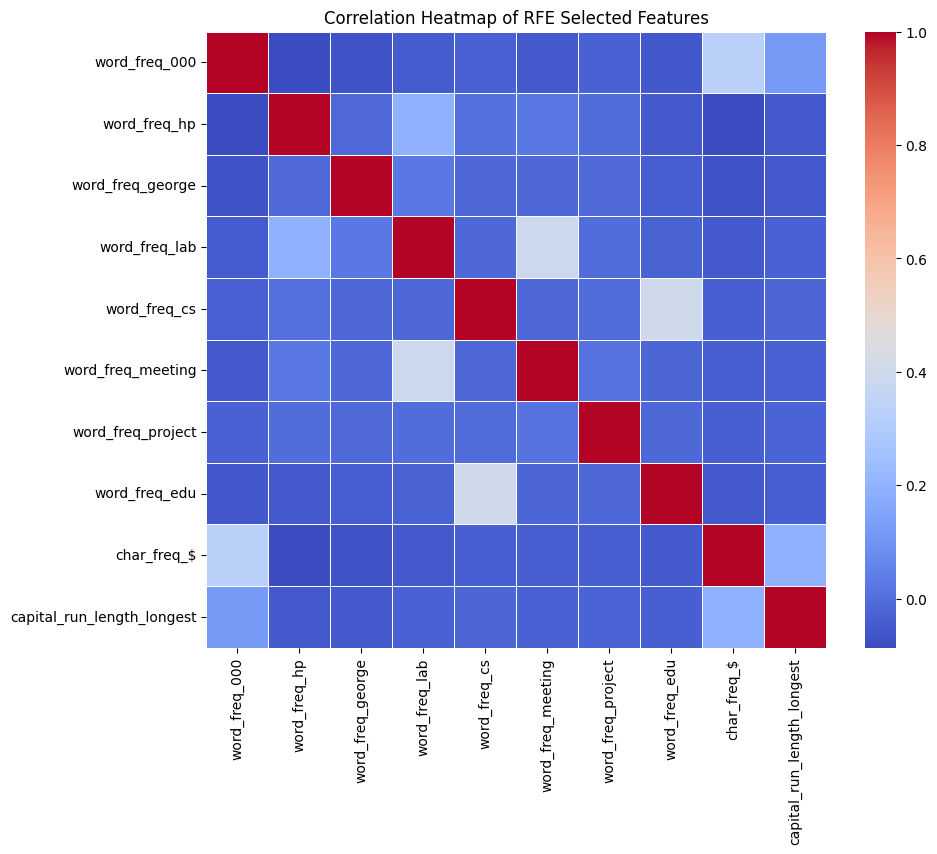

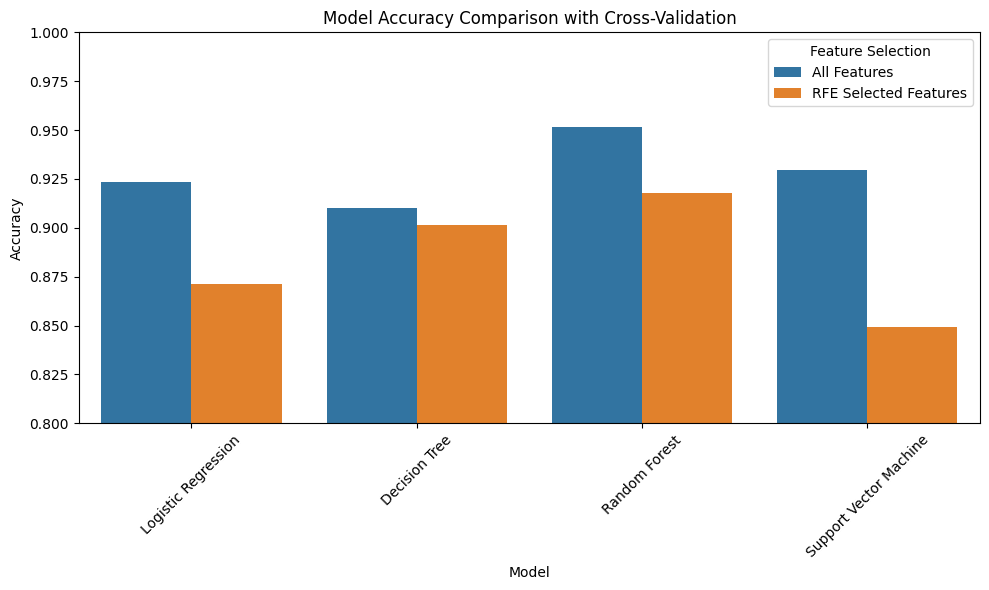

In [ ]:
correlation_matrix_all = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All The Features')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train_scaled, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

selected_feature_names = [X.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
df_selected_features = pd.DataFrame(X_train_selected, columns=[sf[i] for i, selected in enumerate(rfe.support_) if selected])

correlation_matrix_selected = df_selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}

cv_folds = 10

# Train and evaluate models with all features using cross-validation
results_all_features = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_folds, scoring='accuracy')
    results_all_features[name] = np.mean(cv_scores)

# Train and evaluate models with RFE-selected features using cross-validation
results_rfe_selected_features = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=cv_folds, scoring='accuracy')
    results_rfe_selected_features[name] = np.mean(cv_scores)

# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with Cross-Validation')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()


#**ACCURACY SCORES**

In [ ]:
print("Accuracy scores for models trained with all of the features:")
for name, score in results_all_features.items():
    print(f"{name}: {score:.4f}")

print("\nAccuracy scores for models trained with RFE-selected features:")
for name, score in results_rfe_selected_features.items():
    print(f"{name}: {score:.4f}")


Accuracy scores for models trained with all of the features:
Logistic Regression: 0.9236
Decision Tree: 0.9101
Random Forest: 0.9514
Support Vector Machine: 0.9296

Accuracy scores for models trained with RFE-selected features:
Logistic Regression: 0.8715
Decision Tree: 0.9014
Random Forest: 0.9177
Support Vector Machine: 0.8492


#**MODEL EVALUATION**

Logistic Regression,
Decision Tree,
Random Forest,
SVM,
Stacking,
AdaBoost,
Bagging,
Boosting

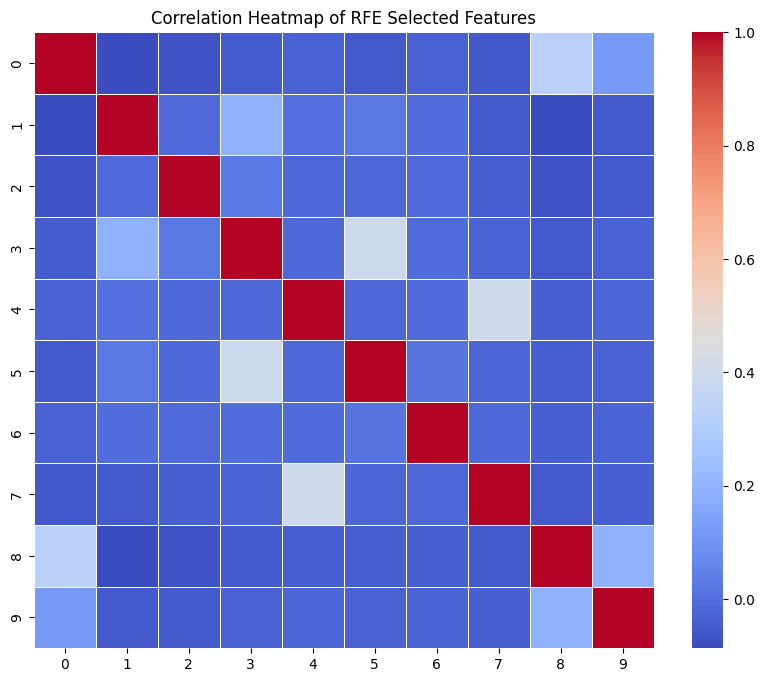

Accuracy scores for models with RFE-selected features:
Logistic Regression: 0.8715
Decision Tree: 0.9014
Random Forest: 0.9177
Support Vector Machine: 0.8492
Stacking: 0.9166
AdaBoost: 0.9057
Bagging: 0.9130
Boosting: 0.9101


<ipython-input-16-a7f8e1a2470e>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette=colors)


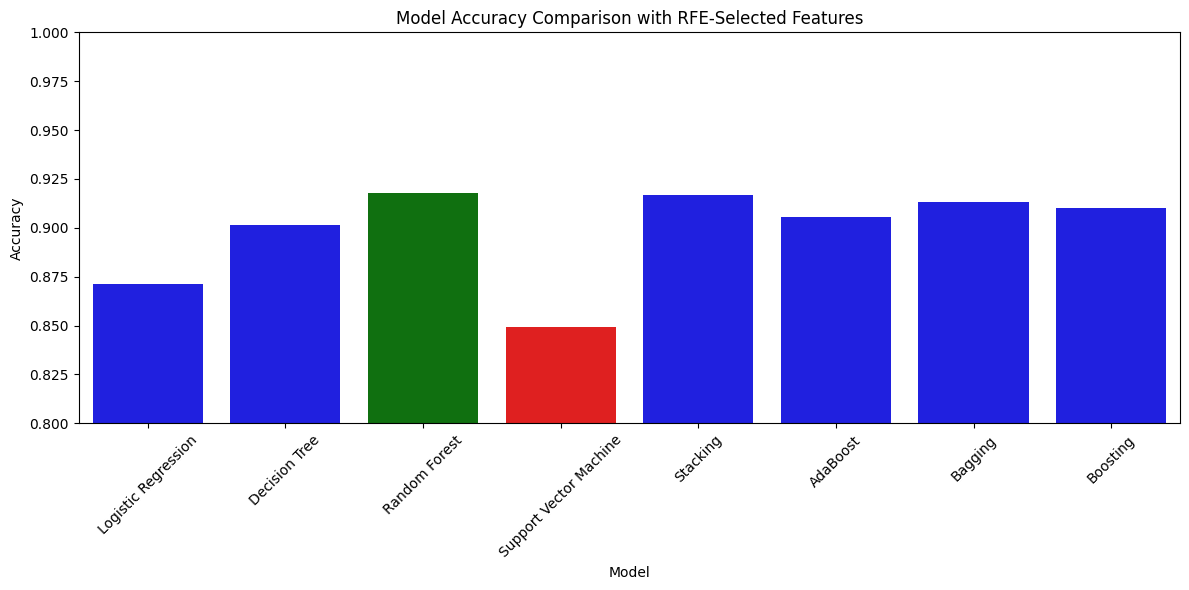

In [ ]:

df_selected_features = pd.DataFrame(X_train_selected)

correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

random_seed = 42
log_reg = LogisticRegression(max_iter=10000, random_state=random_seed)
dec_tree = DecisionTreeClassifier(random_state=random_seed)
rand_forest = RandomForestClassifier(random_state=random_seed)
svc = SVC(probability=True, random_state=random_seed)

# Define ensemble models
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', dec_tree),
        ('rf', rand_forest),
        ('svc', svc)
    ],
    final_estimator=LogisticRegression(max_iter=10000, random_state=random_seed)
)

ada_boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=random_seed),
    random_state=random_seed
)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=random_seed),
    random_state=random_seed
)

gradient_boosting_clf = GradientBoostingClassifier(random_state=random_seed)

# List of models to evaluate
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest,
    "Support Vector Machine": svc,
    "Stacking": stacking_clf,
    "AdaBoost": ada_boost_clf,
    "Bagging": bagging_clf,
    "Boosting": gradient_boosting_clf
}

cv_folds = 10

# Train and evaluate models with RFE-selected features using cross-validation
results_rfe_selected_features = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=cv_folds, scoring='accuracy')
    results_rfe_selected_features[name] = np.mean(cv_scores)

# Print accuracy scores for the models
print("Accuracy scores for models with RFE-selected features:")
for name, score in results_rfe_selected_features.items():
    print(f"{name}: {score:.4f}")

results_df = pd.DataFrame({
    "Model": list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_rfe_selected_features.values())
})

# Find the highest and lowest accuracy scores
max_accuracy = results_df['Accuracy'].max()
min_accuracy = results_df['Accuracy'].min()

# Plotting the accuracy scores
plt.figure(figsize=(12, 6))
colors = ['red' if acc == min_accuracy else 'green' if acc == max_accuracy else 'blue' for acc in results_df['Accuracy']]
sns.barplot(data=results_df, x='Model', y='Accuracy', palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with RFE-Selected Features')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()


In [ ]:
print(X_train_selected.shape)
print(y_train.shape)


(3680, 10)
(3680,)


#**REMOVING OUTLIERS AND MULTICOLLINEARITY**

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Remaining variables: Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'wo

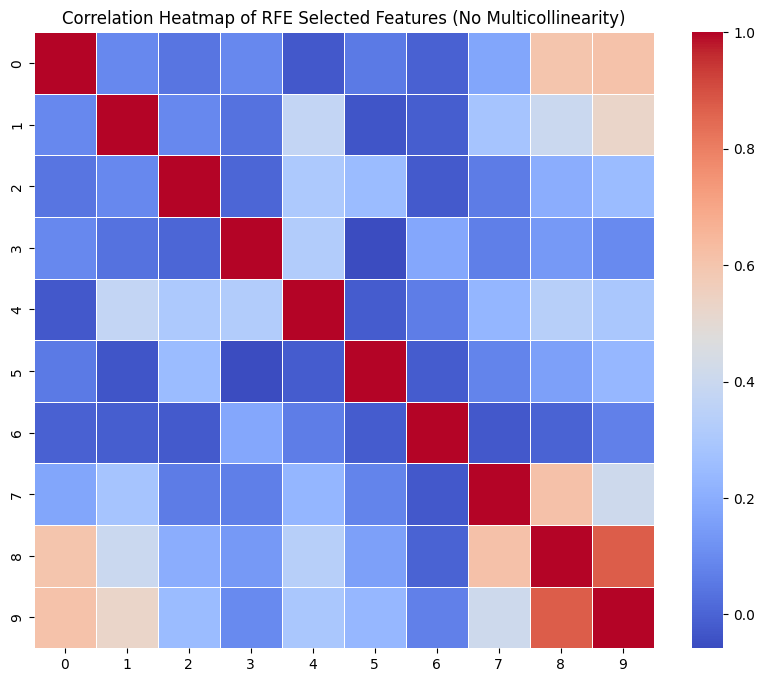

Accuracy scores for models with RFE-selected features:
Logistic Regression: 0.8652
Decision Tree: 0.8510
Random Forest: 0.9005
Support Vector Machine: 0.8867
Stacking: 0.8795
AdaBoost: 0.8862
Bagging: 0.8719
Boosting: 0.8581


<ipython-input-18-836b9f29214f>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette=colors)


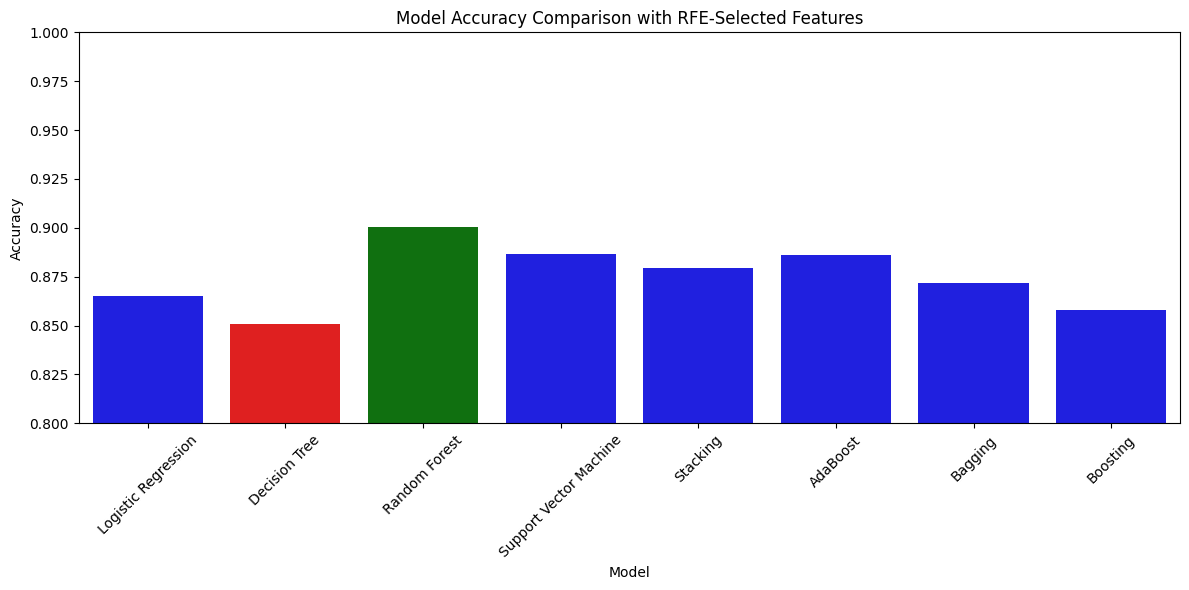

In [ ]:
df = pd.DataFrame(X, columns=sf)
df['Class'] = y  # Add target column to the DataFrame

# Remove outliers
Q1 = df.drop(columns=['Class']).quantile(0.25)
Q3 = df.drop(columns=['Class']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df.drop(columns=['Class']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['Class']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove multicollinearity using VIF
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping {X.iloc[:, variables].columns[maxloc]} with VIF={max_vif}")
            del variables[maxloc]
            dropped = True
    print(f'Remaining variables: {X.columns[variables]}')
    return X.iloc[:, variables]

X_no_multicollinearity = calculate_vif(df_no_outliers.drop(columns=['Class']))

# Update target labels after removing outliers and multicollinearity
y_no_outliers_multicollinearity = df_no_outliers['Class']
X_no_outliers_multicollinearity = df_no_outliers.drop(columns=['Class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers_multicollinearity, y_no_outliers_multicollinearity, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train_scaled, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected)

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features (No Multicollinearity)')
plt.show()

# List of models to evaluate
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest,
    "Support Vector Machine": svc,
    "Stacking": stacking_clf,
    "AdaBoost": ada_boost_clf,
    "Bagging": bagging_clf,
    "Boosting": gradient_boosting_clf
}

# Number of cross-validation folds
cv_folds = 10

# Train and evaluate models with RFE-selected features using cross-validation
results_rfe_selected_features = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=cv_folds, scoring='accuracy')
    results_rfe_selected_features[name] = np.mean(cv_scores)

# Print accuracy scores for the models
print("Accuracy scores for models with RFE-selected features:")
for name, score in results_rfe_selected_features.items():
    print(f"{name}: {score:.4f}")

# Prepare the results DataFrame
results_df = pd.DataFrame({
    "Model": list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_rfe_selected_features.values())
})

# Find the highest and lowest accuracy scores
max_accuracy = results_df['Accuracy'].max()
min_accuracy = results_df['Accuracy'].min()

# Plotting the accuracy scores
plt.figure(figsize=(12, 6))
colors = ['red' if acc == min_accuracy else 'green' if acc == max_accuracy else 'blue' for acc in results_df['Accuracy']]
sns.barplot(data=results_df, x='Model', y='Accuracy', palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with RFE-Selected Features')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()






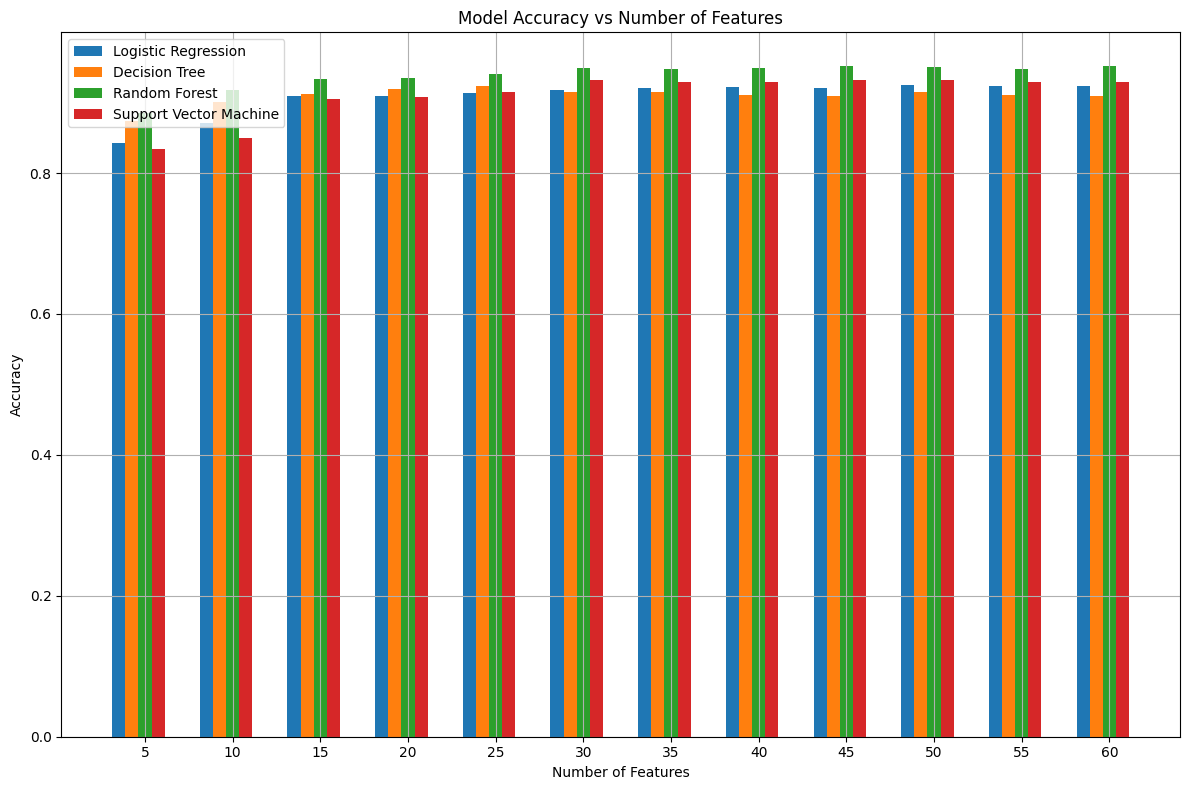

In [ ]:
# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Initialize lists to store results
results = []

# Loop through different numbers of features
for num_features in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create RFE object and specify the number of features to select
    rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=num_features)

    # Fit RFE to training data (excluding the target variable)
    rfe.fit(X_train_scaled, y_train)

    # Transform the training and testing data to include only the selected features
    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)

    # Train and evaluate models with RFE-selected features
    model_results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train_selected, y_train, cv=10, scoring='accuracy')
        model_results[name] = np.mean(cv_scores)

    # Store results
    results.append((num_features, model_results))

# Plotting
plt.figure(figsize=(12, 8))

num_models = len(models)
bar_width = 0.15
index = np.arange(len(results))

for i, (name, _) in enumerate(models.items()):
    accuracies = [model_results[name] for _, model_results in results]
    plt.bar(index + i * bar_width, accuracies, bar_width, label=name)

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of Features')
plt.xticks(index + (bar_width * num_models) / 2, [num_features for num_features, _ in results])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


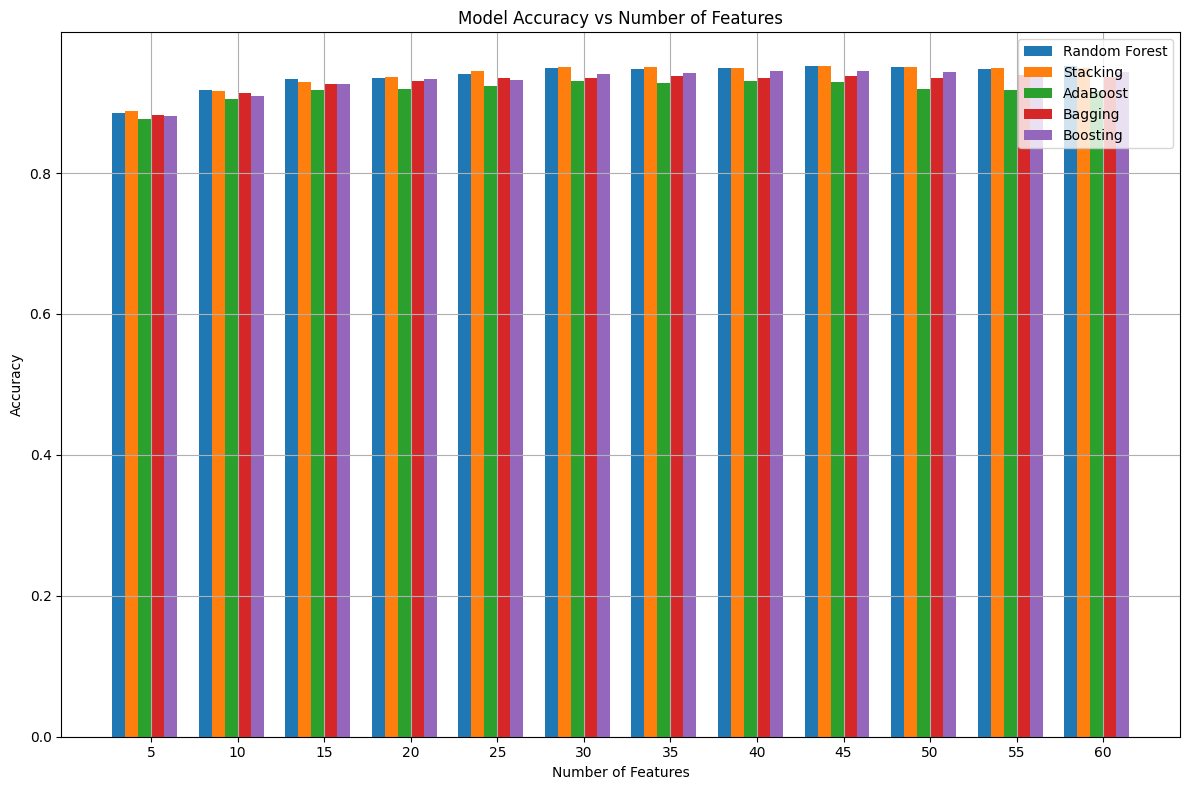

In [ ]:
# Define ensemble models
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', dec_tree),
        ('rf', rand_forest),
        ('svc', svc)
    ],
    final_estimator=LogisticRegression(max_iter=10000, random_state=random_seed)
)

ada_boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=random_seed),
    random_state=random_seed
)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=random_seed),
    random_state=random_seed
)

gradient_boosting_clf = GradientBoostingClassifier(random_state=random_seed)

# Define models with random seed
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Stacking": stacking_clf,
    "AdaBoost": ada_boost_clf,
    "Bagging": bagging_clf,
    "Boosting": gradient_boosting_clf
}

# Initialize lists to store results
results = []

# Loop through different numbers of features
for num_features in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create RFE object and specify the number of features to select
    rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=num_features)

    # Fit RFE to training data (excluding the target variable)
    rfe.fit(X_train_scaled, y_train)

    # Transform the training and testing data to include only the selected features
    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)

    # Train and evaluate models with RFE-selected features
    model_results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train_selected, y_train, cv=10, scoring='accuracy')
        model_results[name] = np.mean(cv_scores)

    # Store results
    results.append((num_features, model_results))

# Plotting
plt.figure(figsize=(12, 8))

num_models = len(models)
bar_width = 0.15
index = np.arange(len(results))

for i, (name, _) in enumerate(models.items()):
    accuracies = [model_results[name] for _, model_results in results]
    plt.bar(index + i * bar_width, accuracies, bar_width, label=name)

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of Features')
plt.xticks(index + (bar_width * num_models) / 2, [num_features for num_features, _ in results])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**CONCLUSION**

With Spambase Dataset, it is observed that Random Forest performed well with Standardized feature and with cross validation (10 folds), followed by Decision Tree, Logistic Regression and SVM with RFE. But with all of the features, Random Forest still attained the highest accuracy while Decision Tree is the lowest. After the outliers and multicollinearity is handled and ensemble method such as Stacking, AdaBoost, Bagging and Boosting is applied, in comparison with the other models, it can be seen that Random Forest Classifier consistently obtained the highest accuracy of 90% with 10 selected features.